In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# The Problem:


Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption. This is a classification problem because we are trying to predict if the user will be adopted or not. 


In [111]:
#read data

users = pd.read_csv("C:/Users/jeffr/Downloads/1481069814_relax_challenge/relax_challenge/takehome_users.csv",encoding = "ISO-8859-1")
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [112]:
#read data

user_engagement = pd.read_csv("C:/Users/jeffr/Downloads/1481069814_relax_challenge/relax_challenge/takehome_user_engagement.csv")
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [113]:
#check how many users total

user_engagement["user_id"].unique()

array([    1,     2,     3, ..., 11998, 11999, 12000], dtype=int64)

There are 12,000 users

In [114]:
#convert to datetime

user_engagement["datetime"] = pd.to_datetime(user_engagement.time_stamp)

In [115]:
#Identify adopted users

user_engagement_counts = user_engagement["user_id"].value_counts()
user_engagement_3_or_more = user_engagement[user_engagement["user_id"].isin(user_engagement_counts[user_engagement_counts > 2].index)]
user_engagement_3_or_more.head()

,time_stamp,user_id,visited,datetime
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04


In [116]:
#Create list of adopted users, and iterate through users, checking to see if the user has logged in three days within a week.

adopted_users = []
for user in user_engagement_3_or_more["user_id"].unique():
    users_engagement = user_engagement_3_or_more[user_engagement_3_or_more["user_id"] == user]
    users_datetime = users_engagement["datetime"].reset_index()["datetime"]
    for i in range(len(users_datetime) - 2):
        time_interval = users_datetime[i + 2] - users_datetime[i]
        if time_interval < pd.Timedelta("7 days"):
            adopted_users.append(user)
            break

len(adopted_users)

1602

Of the 12,000 users, only 1602 were adopted

In [117]:
#match adopted users list to users

user_adoption_in = users["object_id"].isin(adopted_users)
user_adoption_in.head()

0    False
1     True
2    False
3    False
4    False
Name: object_id, dtype: bool

In [118]:
#create new boolean feature that indicates adopted status of user

users['adopted'] = users["object_id"].isin(adopted_users)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [119]:
#check null values

users.isnull().any()


object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time     True
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
adopted                       False
dtype: bool

In [120]:
# drop missing values
users = users.dropna()
users.isnull().any()

object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time    False
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id            False
adopted                       False
dtype: bool

In [121]:
#get dummies for categorical variables

users = pd.get_dummies(users, columns=['creation_source'])
users.head()

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,False,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,316.0,True,0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,False,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,False,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,False,1,0


In [122]:
#drop columns that dont contribute to prediction

DROP = ['name','object_id','email']

users.drop(DROP, axis=1,inplace=True)

In [123]:
#convert creation time to datetime, and split

users.creation_time = pd.to_datetime(users.creation_time)

users['creation_month'] = users.creation_time.dt.month
users['creation_year'] = users.creation_time.dt.year
users['creation_day'] = users.creation_time.dt.dayofweek

users.drop('creation_time', axis=1,inplace=True)

In [124]:
#Preprocessing finished, examine dataframe

users.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_month,creation_year,creation_day
0,1.398139e+09,1,0,11,10803.0,False,1,0,4,2014,1
1,1.396238e+09,0,0,1,316.0,True,0,1,11,2013,4
2,1.363735e+09,0,0,94,1525.0,False,0,1,3,2013,1
3,1.369210e+09,0,0,1,5151.0,False,1,0,5,2013,1
4,1.358850e+09,0,0,193,5240.0,False,1,0,1,2013,3


# Predictive Model 

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [126]:
#Set target variable and features to predict target variable

x = users.drop(['adopted'], axis=1)
y = users.adopted

# Split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 50)

In [127]:
#define regressor

random_forest = RandomForestRegressor()

In [128]:
#Fit model

random_forest.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [129]:
#evaluate model performance

random_forest.score(x_test,y_test)

0.7934022150666996

In [130]:
#store prediction

predictions = random_forest.predict(x_test)

In [136]:
#determine feature importances

RF_features = random_forest.feature_importances_
RF_indices = np.argsort(RF_features)[::-1]
RF_names = x_test.columns

In [137]:
#sort by importance

RF_names[RF_indices][:10]
RF_features[RF_indices][:10]

array([0.56001377, 0.18135073, 0.14600257, 0.0436519 , 0.03944253,
       0.01697718, 0.00471364, 0.00288665, 0.00248633, 0.0024747 ])

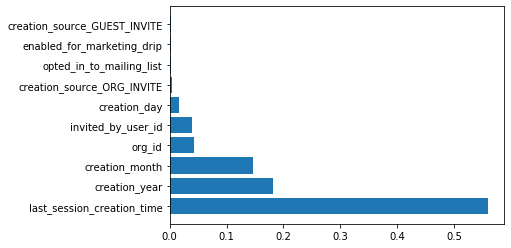

In [138]:
#visually examine importance of features

plt.barh(RF_names[RF_indices][:15],RF_features[RF_indices][:15]);

My model suggests that the features that contribute the most to predicting future user adoption are as follows in descending order:

1. Last Session Creation Time
2. Creation Year
3. Creation Month
4. Organization ID 
5. Invited by User ID
6. Creation Day
7. Creation Source: invited to organization as a full member
8. Opted into Mailing List 
9. Enabled for marketing drip 
10. Creation Source: invited to organization as a guest

    